In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [323]:
df = pd.read_csv('heartdisease.csv')

In [324]:
df.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [325]:
df.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [326]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0


In [327]:
#as we can see there is lot of missing values in ?

In [328]:
df.replace('?', np.nan, inplace=True)

In [329]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
1,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
2,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
3,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,NaN,NaN,0


In [330]:
from sklearn.preprocessing import Imputer

In [331]:
imp=Imputer(missing_values='NaN',strategy='most_frequent')

In [332]:
imp=imp.fit(df)
dst=imp.transform(df.values)


In [333]:

dst=pd.DataFrame(dst)

In [334]:
dst.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,0.0,7.0,0.0
1,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,0.0,7.0,2.0
2,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,0.0,7.0,1.0
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,0.0,7.0,0.0
4,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.0,0.0,7.0,0.0


In [335]:
dst.columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

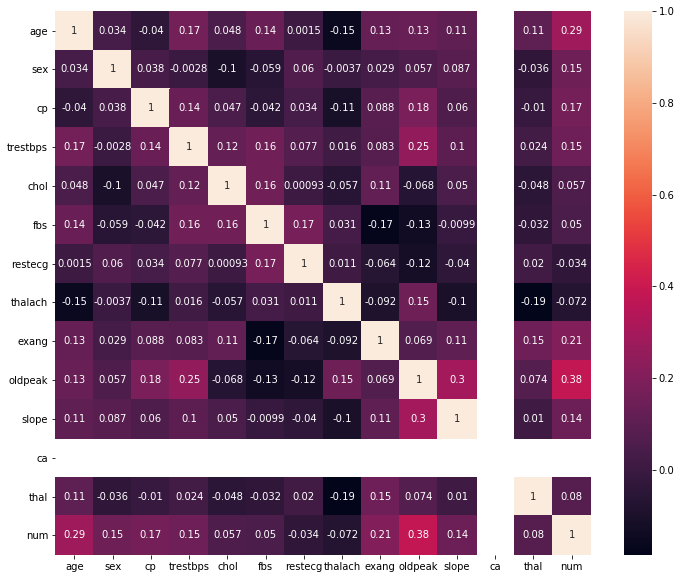

In [336]:
plt.figure(figsize=(12,10))
sns.heatmap(dst.corr(), annot=True)

In [342]:
df1=dst.drop(['ca'], axis=1)

In [343]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0,0.0
1,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0,2.0
2,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0,1.0
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0,0.0
4,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.0,7.0,0.0


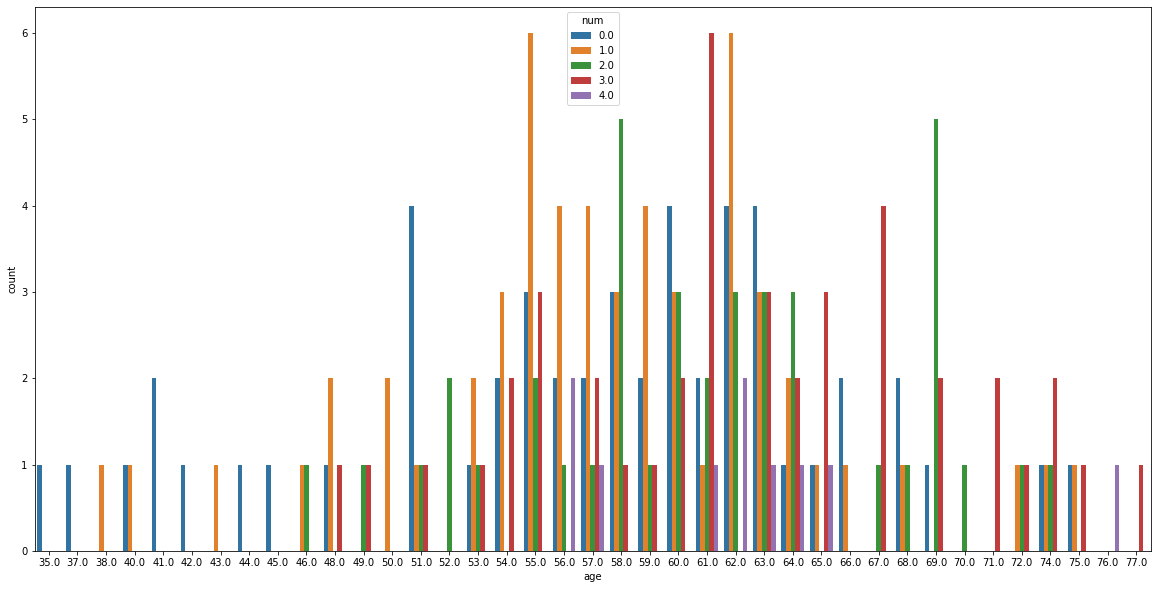

In [344]:
plt.figure(figsize=(20,10))
sns.countplot(x="age", hue="num", data=df1)

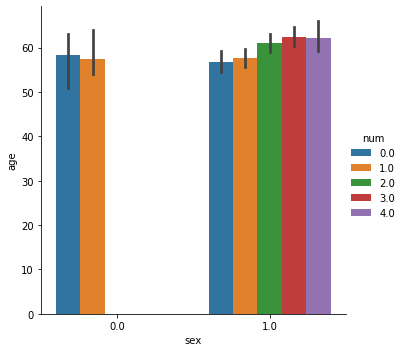

In [345]:
sns.catplot(x="sex",y='age', hue="num",kind='bar', data=df1)

In [346]:
#spliting features and labels
x = df1.iloc[:,:12]
y = df1.iloc[:,-1]

In [347]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0
1,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0
2,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0
3,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0
4,66.0,1.0,3.0,120.0,0.0,0.0,1.0,120.0,0.0,-0.5,1.0,7.0


In [348]:
y.head()

0    0.0
1    2.0
2    1.0
3    0.0
4    0.0
Name: num, dtype: float64

In [359]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =30)

In [360]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.25
[[ 0 11  0  0  0]
 [ 1 10  0  0  0]
 [ 0  9  0  0  0]
 [ 0  7  0  0  0]
 [ 0  2  0  0  0]]


In [361]:
#using linear regression)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [362]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.49056603773584906

In [363]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.4
[[1 4 1 4 1]
 [4 5 0 2 0]
 [0 2 6 1 0]
 [1 2 0 3 1]
 [0 0 1 0 1]]


In [364]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
preddt=rf.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))

0.35
[[3 4 2 2 0]
 [2 9 0 0 0]
 [1 3 2 2 1]
 [1 1 4 0 1]
 [0 0 2 0 0]]
